Steps to follow:

1. Importing modules, data and study the data

2. Analyzing Numerical Features

a). Checking Statistical Summary
b). Checking distribution of numerical features
c). Outlier treatment
d). Inspection Correlation
e). Missing value handling
f). Extracting new features and dropping redundant ones
g). Correcting datatypes
h). Data Visualization

3. Analyzing categorical features:

a). Missing value handling
b). Encoding categorical features
c). Data visualization
d). Dropping redundant features

4. Feature scaling
5. Primary Feature selection using RFE
6. Ridge Regression 
7. Lasso Regression
8. Comparing model coefficients
9. Model Evaluation
10. Choosing the final model and most significant features

In [1]:
# Importing the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrices
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width', 100)

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# importing datasets

df_train = pd.read_csv(r'C:\\Desktop\DT\Project-Housing_splitted\train.csv')
df_test = pd.read_csv(r'C:\\Desktop\DT\Project-Housing_splitted\test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'Ope

In [6]:
# seperating the target variable from the training dataset to treat both, predictors and the target valriable:

df_tr = df_train.drop('SalePrice', axis = 1)

# defining the target variable:

target = df_train['SalePrice']

In [7]:
# Now, from above structure of data it is clear that "Id" column is not going to affect our study,And we can see that column 
#'PoolQC' in both the datasets is only having nan as its value;so we'll drop these columns from our analysis.
## so dropping it from train as well as from test dataset:

df_tr = df_tr.drop(['Id','PoolQC'], axis = 1)

# printing the shape of the datasets:
print(df_tr.shape)

(1168, 78)


In [8]:
df_te = df_test.drop(['Id','PoolQC'], axis = 1)
# printing the shape of the datasets:
print(df_te.shape)

(292, 78)


ANALYZING TARGET VARIABLE:

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

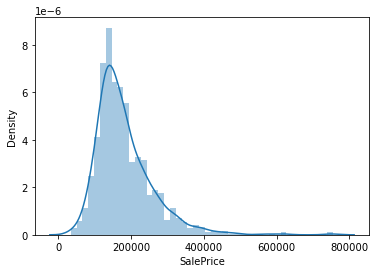

In [9]:
#visualizing the distribution of SalePrice :

sns.distplot(df_train['SalePrice'])

It shows that SalePrice is positively skewed.

In [10]:
# calculating skewness

print("SalePrice Skewness:",df_train['SalePrice'].skew())

SalePrice Skewness: 1.953877705368286


In [11]:
# Checking the missing values in SalePrice:
df_train['SalePrice'].isnull().sum()

0

Which means there is no null value in the Target valriable. Now, we'll treate the skewness of it.

Text(0.5, 1.0, 'Log Trasformed SalePrice')

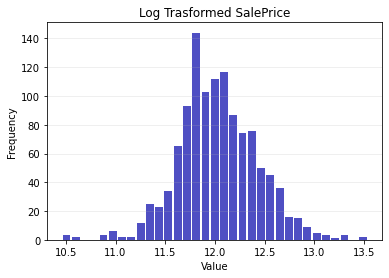

In [12]:
# applying log transformation to make it normally distributed:

target_lt = np.log(target+1)
n, bins, patches = plt.hist(x=target_lt, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=.25)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Log Trasformed SalePrice')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

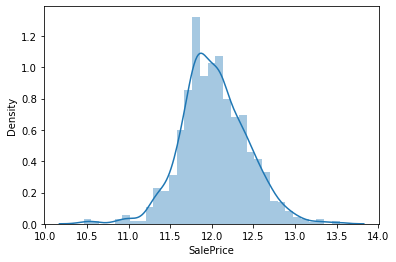

In [13]:
## visualizing the distribution of transformed SalePrice:

sns.distplot(target_lt)

It shows transformed SalePrice become almost normally distributed. So, now we will treat 'target_lt' as target variable.

On analyzing the columns from the dataset and the given data description sheet, we can see that 'MSSubClass' variable is actually a type of categorical variable; however in the dataset it is been treated as numerical. So, we are mapping numeric values in the given dataset to the values given in the description sheet.

In [14]:
df_tr.MSSubClass = df_tr.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [15]:
df_te.MSSubClass = df_te.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

Checking the datatypes :

In [18]:
# Let's check if we need to change the datatype of any numeric column:
# We can observe that 'MSSubClass', "OverallCond", 'YrSold', 'MoSold','YearBuilt' numerical features are actually categorical,
## we already changed 'MSSubClass', "OverallCond";lets now change the date datatypes into categorical:
# from data description sheet we can find that 
### MoSold: Month Sold (MM)
### YrSold: Year Sold (YYYY)
### YearBuilt: Original construction date

features_list = ['YrSold', 'MoSold','YearBuilt']

for feature in features_list:
    df_tr[feature] = df_tr[feature].apply(str)

In [19]:
for feature in features_list:
    df_te[feature] = df_te[feature].apply(str)

In [20]:
# Finding numerical features in the training dataset:
numeric_data = df_tr.select_dtypes(include = [np.number])

# Finding categorical features in the training dataset:
categorical_data = df_tr.select_dtypes(exclude = [np.number])

# Let's print the number of numerical features and categorical features in the training dataset we have:
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 32 numerical and 46 categorical features in the training data


In [21]:
# Finding numerical features in the testing dataset:
numeric_data_te = df_te.select_dtypes(include = [np.number])

# Finding categorical features in the testing dataset:
categorical_data_te = df_te.select_dtypes(exclude = [np.number])

# Let's print the number of numerical features and categorical features in the testing dataset we have:
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data_te.shape[1], categorical_data_te.shape[1]))

There are 32 numerical and 46 categorical features in the training data


ANALYZING NUMERICAL FEATURES:

In [22]:
df_1 = df_tr.copy()

In [23]:
data_test = df_te.copy()

In [ ]:
# get current year 
import datetime
current_year = datetime.datetime.now().year    

# Age of house :

data_train['house_age'] = data_train['YrSold'] - data_train['YearBuilt']

# get current year 
import datetime
current_year = datetime.datetime.now().year    

# Create new feature to identify time in years since last remodel(or construction) was done on house:
data_test['YearSinceLastRemodel'] = current_year - ((data_test['YearRemodAdd'] - data_test['YearBuilt']) + data_test['YearBuilt'])

# Age of house :
data_test['house_age'] = data_test['YrSold'] - data_test['YearBuilt']



In [24]:
numeric_data.columns 

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal'],
      dtype='object')

In [25]:
# let's first check all the Garage related features 
# i.e. 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond' and 'GarageQual'

Garage_list=['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
df_1[Garage_list].isnull().sum()

GarageType      64
GarageYrBlt     64
GarageFinish    64
GarageCars       0
GarageArea       0
GarageQual      64
GarageCond      64
dtype: int64

From above we can see that 'GarageCars','GarageArea' do not has any null value; however all other Garage features are having same number of null values.We also have given in data description sheet that NA in these feilds mean "No Garage". So, we can consider that there must not be Garages present and with this assumtion we'll impute the missing values for Garage features.

In [26]:
# Imputing categorical Garage features with "None" and numeric Garage feature with 0

# Training dataset:
df_1.GarageYrBlt.fillna(0, inplace = True)
df_1.GarageType.fillna("None", inplace = True)
df_1.GarageFinish.fillna("None", inplace = True)
df_1.GarageQual.fillna("None", inplace = True)
df_1.GarageCond.fillna("None", inplace = True)

In [27]:
# Test dataset:

data_test.GarageYrBlt.fillna(0, inplace = True)
data_test.GarageType.fillna("None", inplace = True)
data_test.GarageFinish.fillna("None", inplace = True)
data_test.GarageQual.fillna("None", inplace = True)
data_test.GarageCond.fillna("None", inplace = True)

In [28]:
data_test[Garage_list].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

In [29]:
# finding the columns having numeric missing values:

df_1.select_dtypes(np.number).loc[:, df_1.isna().sum() > 0].columns

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [30]:
data_test.select_dtypes(np.number).loc[:, data_test.isna().sum() > 0].columns

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

Treating LotFrontage:

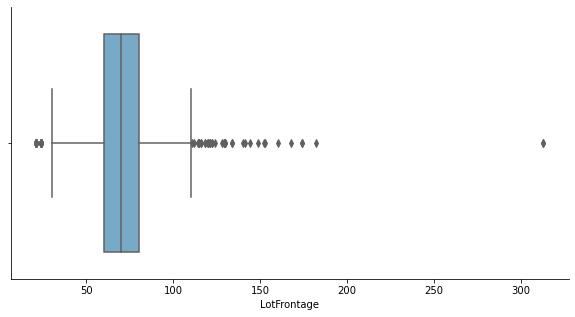

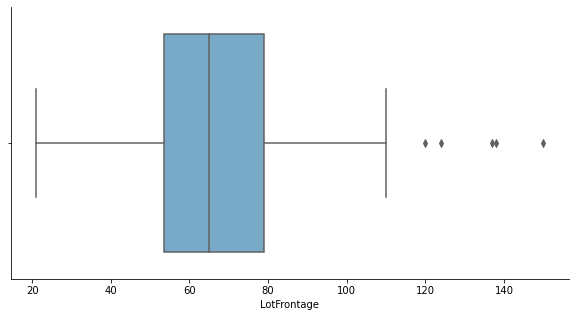

In [31]:
# plot for training dataset:

fig = plt.figure(figsize=(10, 5))
sns.boxplot(df_1.LotFrontage,palette="Blues")
sns.despine()
plt.show()

# Treating LotFrontage in test dataset:

fig = plt.figure(figsize=(10, 5))
sns.boxplot(data_test.LotFrontage,palette="Blues")
sns.despine()
plt.show()

As we can see that LotFrontage has some outliers so to impute missing values we would use median rather than mean(as mean is more valnurable to outliers).

In [32]:
# Replace missing values of LotFrontage with Median

df_1['LotFrontage'] = df_1['LotFrontage'].fillna(df_1['LotFrontage'].median())
df_1['LotFrontage'].isnull().sum()

0

In [33]:
# Replace missing values of LotFrontage with Median in test dataset
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(data_test['LotFrontage'].median())
data_test['LotFrontage'].isnull().sum()

0

TREATING ''MasVnrArea''

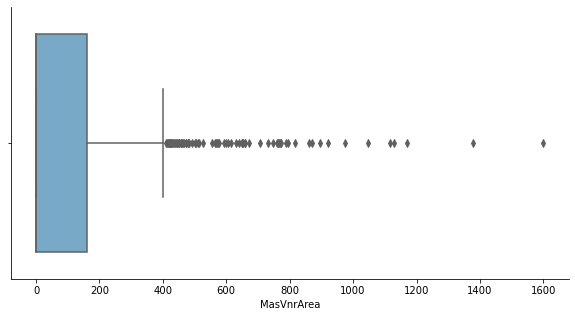

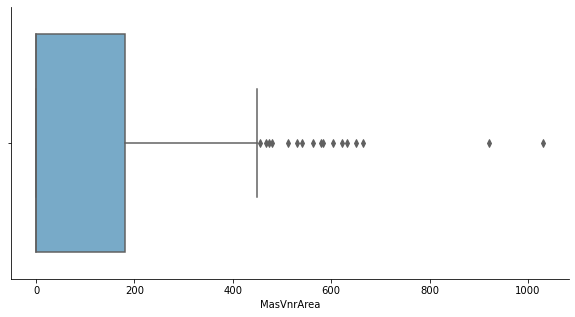

In [34]:
# training dataset
fig = plt.figure(figsize=(10, 5))
sns.boxplot(df_1.MasVnrArea,palette="Blues")
sns.despine()
plt.show()
# test dataset
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data_test.MasVnrArea,palette="Blues")
sns.despine()
plt.show()

In [35]:
# on checking we find Median = Mode for this column and as outliers are their we use median to impute missing values:

## for training dataset:
df_1.MasVnrArea = df_1.MasVnrArea.fillna(df_1.MasVnrArea.median())
df_1['MasVnrArea'].isnull().sum()

0

In [36]:
data_test.MasVnrArea =data_test.MasVnrArea.fillna(data_test.MasVnrArea.median())
data_test['MasVnrArea'].isnull().sum()

0

CHECKING THE DISTRIBUTION OF NUMERICAL FEATURES

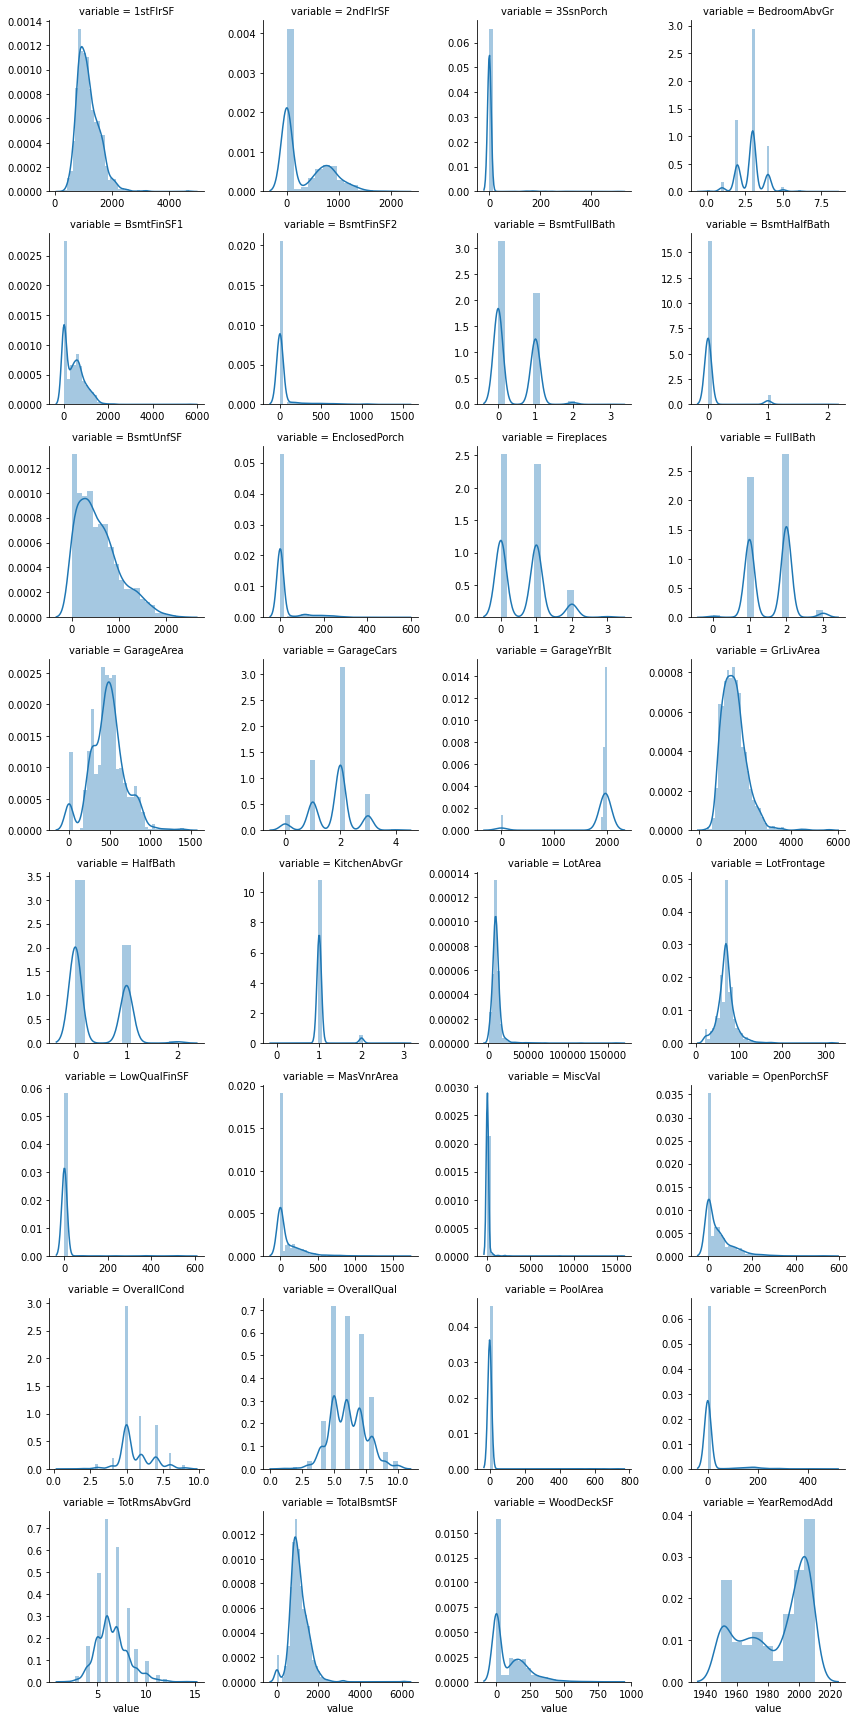

In [37]:
f = pd.melt(df_1, value_vars = sorted(df_1.select_dtypes(include = [np.number])))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

- If we see the 1st graph for variable 'First floor square feet', we observe that it is positively skewed.
- There are lot more features that are positively skewed; like 'GarageArea', 'Lot Frontage', 'Year sold' etc.
- We can see that there are some graphs to be ment for continuous variable they not behaving like that.
e.g. 'Fireplaces', 'LowQualFinSF', 'TotalBsmtSF' etc.
Here we can see that even the values for these variables is numeric but not continuous these are discrete values, we need to convert them in categorical ones.

Analyzing the correlation of the numeric variables

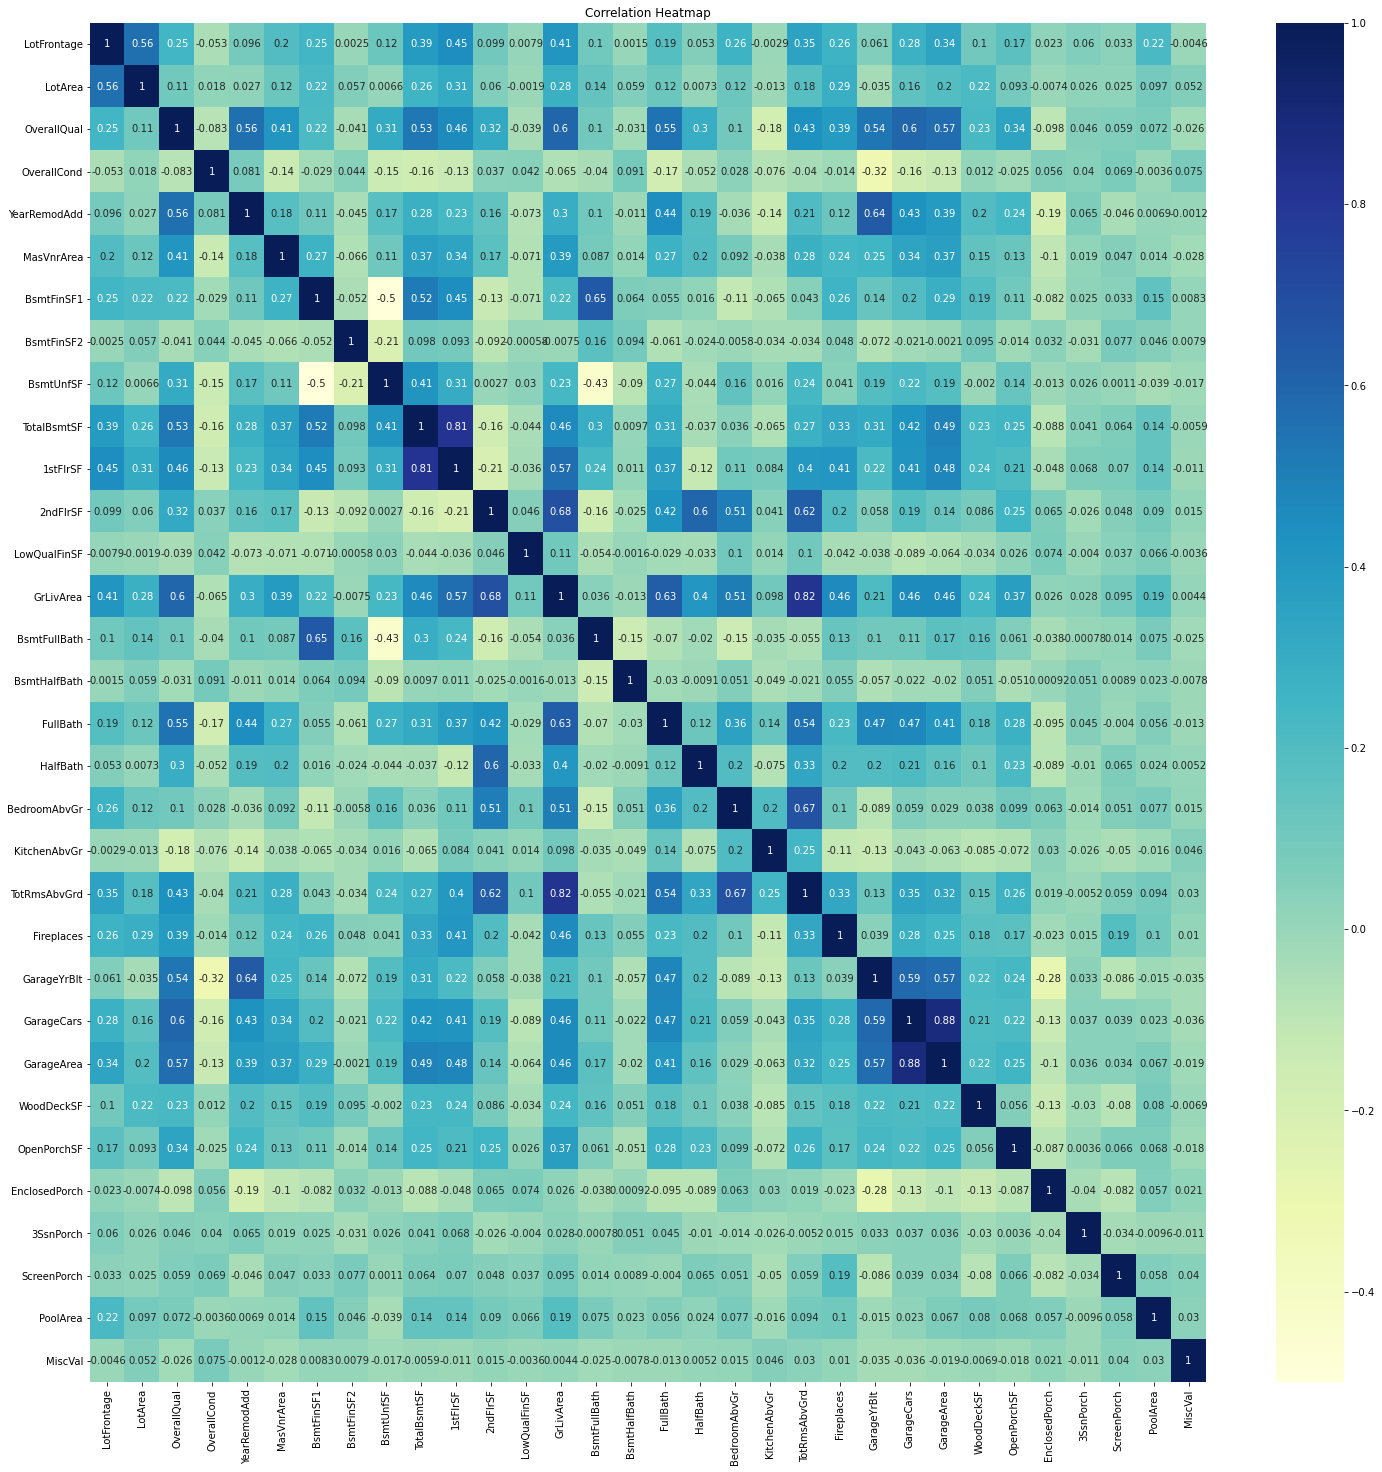

In [38]:
# plotting heat map to study the correlation between features:

corr = numeric_data.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

We are interested in the light color box which represents the significant correlation among the columns and try to remove the multicollinearity.

Few highly correlated pairs: -GrLivArea: Above grade (ground) living area square feet and TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) -Sale Price and OverallQual -Sale Price and GarageArea and Garage Cars.

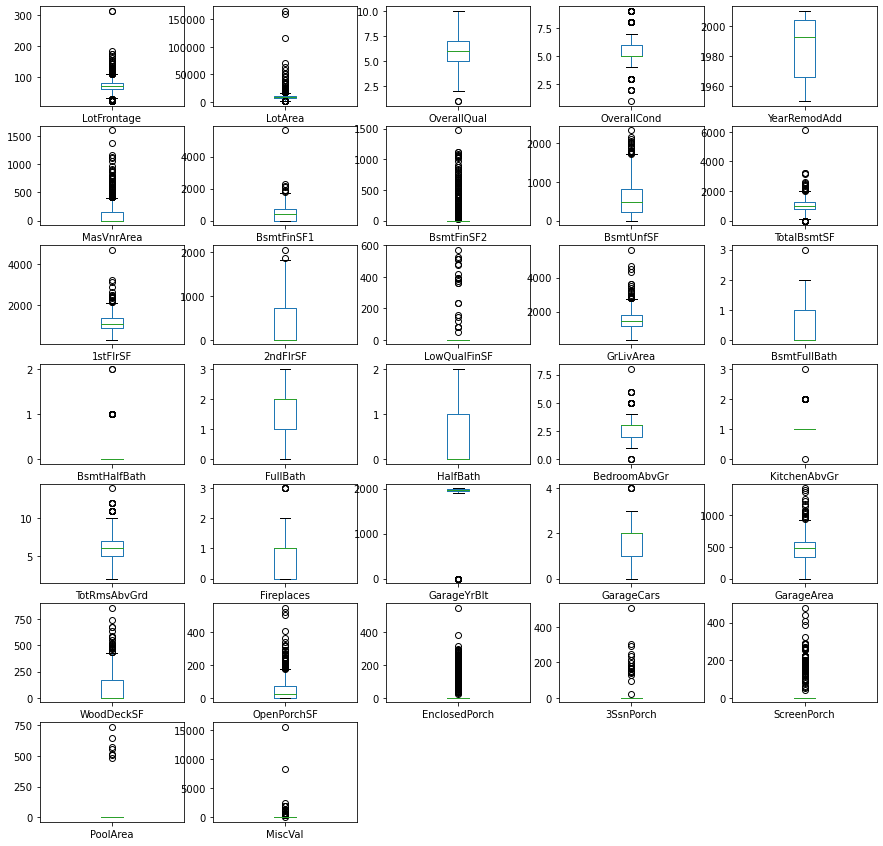

In [39]:
# Checking for the outliers in numerical features:

# Let us first define a function which creates box plots for all the numeric columns

def num_var_box_plot(df=df_1):
    num_data = df.select_dtypes(include = 'number')
    num_vars_per_row = 5
    num_rows = int(np.ceil(len(num_data.columns)/num_vars_per_row))
    fig_num = 0
    plt.figure(figsize=(15,15))
    for col in num_data:
        fig_num += 1
        plt.subplot(num_rows, num_vars_per_row, fig_num)
        num_data[col].plot.box()
    plt.show()
num_var_box_plot(df_1)    

From above it can be observed that for some of the features 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' if we remove outliers nothing will left in that column as they are having vary few values.So its better to drop these variables.

In [40]:
data_train = df_1.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)

In [41]:
data_test = data_test.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)

In [42]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MiscFeature', '

In [44]:
# capping the remaining column's values within 5th and 95th percentile:

num_data = data_train.select_dtypes(include='number')

# We will not consider outliers for date features here :

num_data.drop(['YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

columns_outliers = num_data.columns

# defining a function to filter the data is:
lower_prcntle = 5
upper_prcntle = 100 - lower_prcntle
def treat_outliers(low, high, val):
    if val < low:
        return low
    elif val > high:
        return high
    else:
        return val

for num_var in columns_outliers:
    lower_prnctle_val = num_data[num_var].quantile(lower_prcntle/100)
    upper_prcntle_val = num_data[num_var].quantile(upper_prcntle/100)
    num_data[num_var] = num_data.apply(lambda row: treat_outliers(lower_prnctle_val, upper_prcntle_val, row[num_var]),axis=1)

# implementing the changes to our original dataframe

data_train[num_data.columns] = num_data

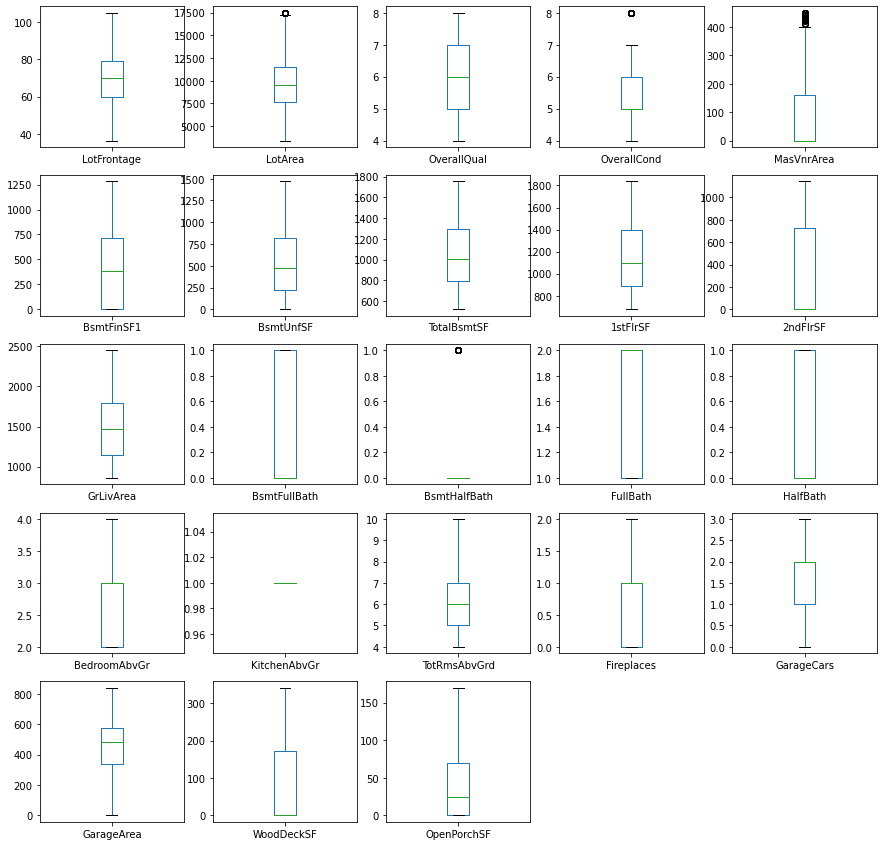

In [45]:
# Lets check once is the outliers are handled
num_var_box_plot(num_data)

In [46]:
# checking the shape of data now:
data_train.shape

(1168, 71)

Now, we are left with 71 columns.

In [47]:
# capping the remaining column's values within 5th and 95th percentile: For test dataset

num_data_test = data_test.select_dtypes(include='number')

# We will not consider outliers for date features here :

num_data_test.drop(['YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

columns_outliers = num_data_test.columns

# defining a function to filter the data is:
lower_prcntle = 5
upper_prcntle = 100 - lower_prcntle
def treat_outliers(low, high, val):
    if val < low:
        return low
    elif val > high:
        return high
    else:
        return val

for num_var in columns_outliers:
    lower_prnctle_val = num_data_test[num_var].quantile(lower_prcntle/100)
    upper_prcntle_val = num_data_test[num_var].quantile(upper_prcntle/100)
    num_data_test[num_var] = num_data_test.apply(lambda row: treat_outliers(lower_prnctle_val, upper_prcntle_val, row[num_var]),axis=1)

# implementing the changes to our original dataframe

data_test[num_data_test.columns] = num_data_test

In [48]:
data_test.shape

(292, 71)

FEATURE ENGINEERING

In [51]:
# We'll perform feature engineering to create new features from existing ones:

# Total Square Footage (TotalSF) : Total sum of area available with each house :
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF'] + data_train['GarageArea'] + data_train['WoodDeckSF'] + data_train['OpenPorchSF']

# Total Living Area divided by LotArea:
data_train['PercentLivingtoLot'] = data_train['TotalSF'] / data_train['LotArea']
    
# Total Number of Bathrooms available with the house:
data_train['TotalBath'] = data_train['FullBath'] + (0.5 * data_train['HalfBath']) + data_train['BsmtFullBath'] + (0.5 * data_train['BsmtHalfBath'])   
    

# Creating new binary features to understand if the house has the desired facility available or not:

data_train['Has2ndFloor'] = data_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data_train['HasGarage'] = data_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_train['HasBsmt'] = data_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_train['HasFireplace'] = data_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [52]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,TotalSF,PercentLivingtoLot,TotalBath,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
0,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6.0,5.0,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.00,TA,TA,CBlock,Gd,TA,No,ALQ,120.0,Unf,958.0,1078.00,GasA,TA,Y,SBrkr,958.0,0.0,958.0,0.0,0.0,2.0,0.0,2.0,1.0,TA,5.0,Typ,1.0,TA,Attchd,1977.0,RFn,2.0,440.0,TA,TA,Y,0.0,170.0,NaN,NaN,2,2007,WD,Normal,2646.00,0.536932,2.0,0,1,1,1
1,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8.0,6.0,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.00,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351.0,Rec,1043.0,1752.65,GasA,Ex,Y,SBrkr,1836.2,0.0,2217.0,1.0,0.0,2.0,0.0,4.0,1.0,Gd,8.0,Typ,1.0,TA,Attchd,1970.0,Unf,2.0,621.0,TA,TA,Y,81.0,170.0,NaN,NaN,10,2007,WD,Normal,4460.85,0.281176,3.0,0,1,1,1
2,2-STORY 1946 & NEWER,RL,92.0,9920.0,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7.0,5.0,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.00,Gd,TA,PConc,Gd,TA,Av,GLQ,862.0,Unf,255.0,1117.00,GasA,Ex,Y,SBrkr,1127.0,886.0,2013.0,1.0,0.0,2.0,1.0,3.0,1.0,TA,8.0,Typ,1.0,TA,Attchd,1997.0,Unf,2.0,455.0,TA,TA,Y,180.0,130.0,NaN,NaN,6,2007,WD,Normal,3895.00,0.392641,3.5,1,1,1,1
3,1-STORY 1946 & NEWER ALL STYLES,RL,105.0,11751.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,449.95,TA,TA,CBlock,Gd,TA,No,BLQ,705.0,Unf,1139.0,1752.65,GasA,Ex,Y,SBrkr,1836.2,0.0,1844.0,0.0,0.0,2.0,0.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,1977.0,RFn,2.0,546.0,TA,TA,Y,0.0,122.0,MnPrv,NaN,1,2010,COD,Normal,4256.85,0.362254,2.0,0,1,1,1
4,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,16635.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.0,7.0,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.00,Gd,TA,CBlock,Gd,TA,No,ALQ,1246.0,Unf,356.0,1602.00,GasA,Gd,Y,SBrkr,1602.0,0.0,1602.0,0.0,1.0,2.0,0.0,3.0,1.0,Gd,8.0,Typ,1.0,TA,Attchd,1977.0,Fin,2.0,529.0,TA,TA,Y,240.0,0.0,NaN,NaN,6,2009,WD,Normal,3973.00,0.238834,2.5,0,1,1,1


In [53]:
# For testing dataset

# Total Square Footage (TotalSF) : Total sum of area available with each house :
data_test['TotalSF'] = data_test['TotalBsmtSF'] + data_test['1stFlrSF'] + data_test['2ndFlrSF'] + data_test['GarageArea'] + data_test['WoodDeckSF'] + data_test['OpenPorchSF']

# Total Living Area divided by LotArea:
data_test['PercentLivingtoLot'] = data_test['TotalSF'] / data_test['LotArea']
    
# Total Number of Bathrooms available with the house:
data_test['TotalBath'] = data_test['FullBath'] + (0.5 * data_test['HalfBath']) + data_test['BsmtFullBath'] + (0.5 * data_test['BsmtHalfBath'])   
    

# Creating new binary features to understand if the house has the desired facility available or not:

data_test['Has2ndFloor'] = data_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data_test['HasGarage'] = data_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data_test['HasBsmt'] = data_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data_test['HasFireplace'] = data_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [54]:
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,TotalSF,PercentLivingtoLot,TotalBath,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
0,1-STORY 1946 & NEWER ALL STYLES,RL,86.0,14157.0,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8.0,5.0,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1242.95,Unf,673.0,1742.55,GasA,Ex,Y,SBrkr,1789.8,0.0,1922.0,1.0,0.0,2.0,0.0,3.0,1.0,Gd,8.0,Typ,1.0,Gd,Attchd,2005.0,Fin,3.0,676.0,TA,TA,Y,178.0,51.0,NaN,NaN,7,2007,WD,Normal,4437.35,0.313439,3.0,0,1,1,1
1,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,65.0,5814.0,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036.00,Unf,184.0,1220.00,GasA,Gd,Y,SBrkr,1360.0,0.0,1360.0,1.0,0.0,1.0,0.0,2.0,1.0,Gd,4.0,Typ,1.0,Ex,Attchd,1984.0,RFn,2.0,565.0,TA,TA,Y,63.0,0.0,NaN,NaN,8,2009,COD,Abnorml,3208.00,0.551772,2.0,0,1,1,1
2,1-STORY 1946 & NEWER ALL STYLES,RL,65.0,11838.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8.0,5.0,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.00,Unf,1415.4,1742.55,GasA,Ex,Y,SBrkr,1788.0,0.0,1788.0,0.0,0.0,2.0,0.0,3.0,1.0,Ex,7.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,522.0,TA,TA,Y,202.0,151.0,NaN,NaN,6,2009,WD,Normal,4405.55,0.372153,2.0,0,1,1,1
3,2-STORY 1945 & OLDER,RL,75.0,12000.0,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,7.0,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275.00,Unf,429.0,704.00,GasA,Ex,Y,SBrkr,860.0,704.0,1564.0,0.0,0.0,1.0,1.0,3.0,1.0,Fa,7.0,Typ,1.0,Gd,Attchd,1941.0,Unf,1.0,234.0,TA,TA,Y,0.0,0.0,NaN,NaN,7,2009,WD,Normal,2502.00,0.208500,1.5,1,1,1,1
4,2-STORY 1946 & NEWER,RL,86.0,14598.0,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6.0,5.0,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.00,Unf,894.0,894.00,GasA,Ex,Y,SBrkr,894.0,1039.0,1933.0,0.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Gd,BuiltIn,2007.0,Fin,3.0,668.0,TA,TA,Y,100.0,18.0,NaN,NaN,1,2008,WD,Normal,3613.00,0.247500,2.5,1,1,1,1


In [ ]:
# Let's check if we need to change the datatype of any numeric column:
# We can observe that 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold','YearBuilt' numerical features are actually categorical,
## we already changed 'MSSubClass', 'OverallCond';lets now change the date datatypes into categorical:
# from data description sheet we can find that 
### MoSold: Month Sold (MM)
### YrSold: Year Sold (YYYY)
### YearBuilt: Original construction date

features_list = ['YrSold', 'MoSold','YearBuilt']

for feature in features_list:
    data_train[feature] = data_train[feature].apply(str)

In [ ]:
for feature in features_list:
    data_test[feature] = data_test[feature].apply(str)

In [55]:
data_train.shape

(1168, 78)

In [56]:
data_test.shape

(292, 78)

In [57]:
# Finding numerical features in the training dataset:
num_data_train = data_train.select_dtypes(include = [np.number])

# Finding categorical features in the testing dataset:
cat_data_train = data_train.select_dtypes(exclude = [np.number])

# Let's print the number of numerical features and categorical features in the testing dataset we have:
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(num_data_train.shape[1], cat_data_train.shape[1]))

There are 32 numerical and 46 categorical features in the training data


In [58]:
# Finding numerical features in the testing dataset:
num_data_test = data_test.select_dtypes(include = [np.number])

# Finding categorical features in the testing dataset:
cat_data_test = data_test.select_dtypes(exclude = [np.number])

# Let's print the number of numerical features and categorical features in the testing dataset we have:
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(num_data_test.shape[1], cat_data_test.shape[1]))

There are 32 numerical and 46 categorical features in the training data


In [156]:
#Columns in df2 not in df1
# df2.columns.difference(df1.columns)
data_tr.columns.difference(test.columns)

Index(['Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Other', 'Neighborhood_Blueste'], dtype='object')

Now, let's dive into numerical features of the dataset achieved so far:

DATA VISUALIZATION(numerical features)

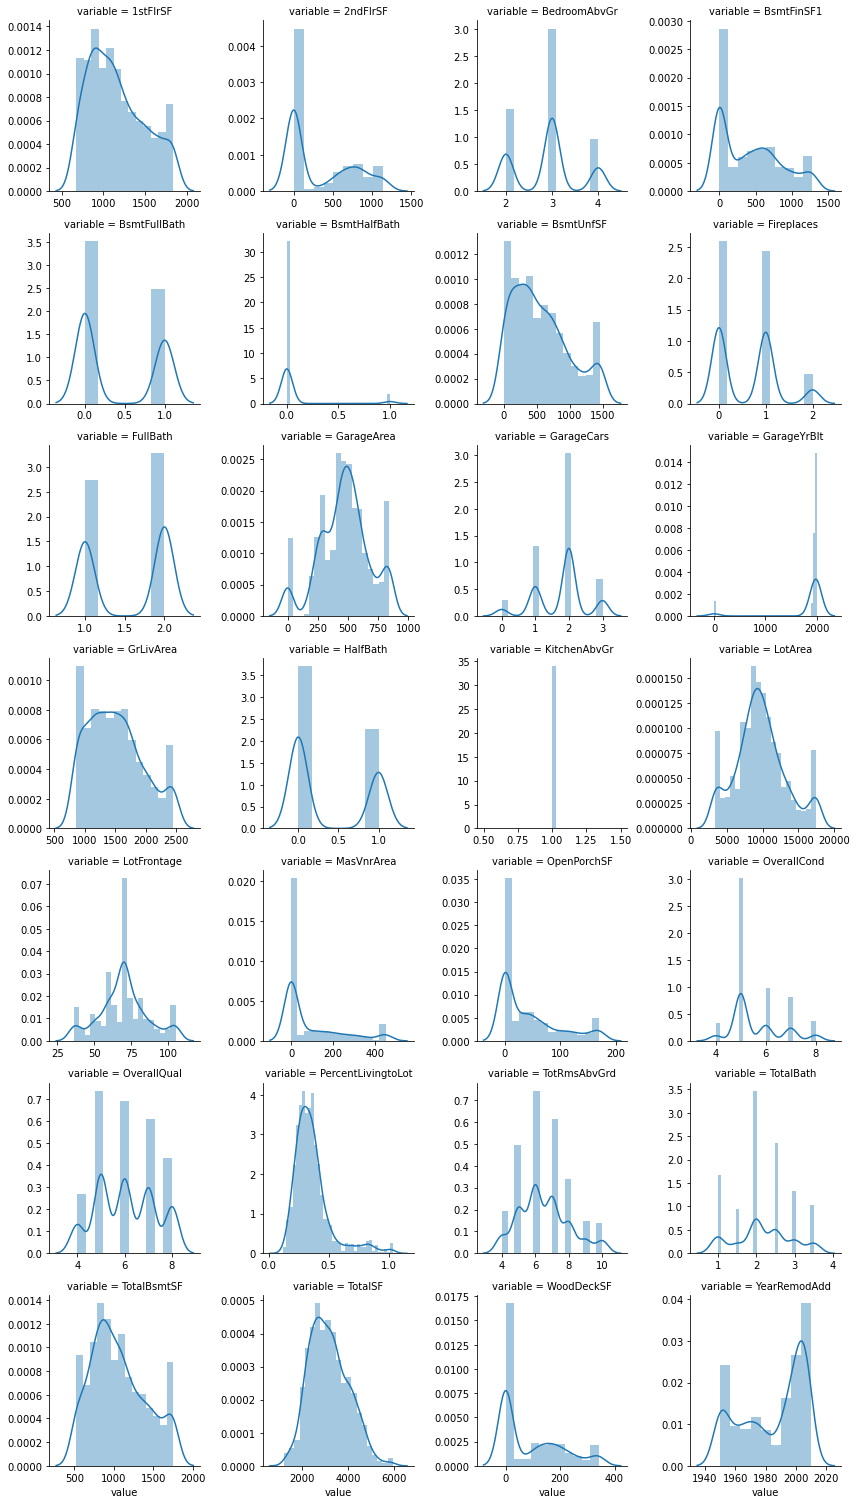

In [59]:
# Again checking the distribution of the numerical features in the treated training dataset 

numeric_cols = data_train.select_dtypes(include=[np.number]).columns.tolist()

# for this we will exclude columns which we have derived from the dataset:

exclude_cols = ['Has2ndFloor','HasGarage','HasBsmt','HasFireplace']
plot_cols = [i for i in list(numeric_cols) if i not in exclude_cols]

# Plotting the distribution of numerical features:

f = pd.melt(data_train, value_vars = sorted(plot_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

From above it can be seen that most the features are still skewed and have to be transformed.

In [60]:
# Now our task is to find out the numerical features which need transformation:
## For this we are considering cut-off skewness as 0.5:

# Identifying highly skewed features:

features_skewed = data_train[plot_cols].apply(lambda x: x.skew()).sort_values(ascending=False)

# Defining cut-off skewness = 0.5:

features_need_trans = features_skewed[features_skewed > 0.5]
trans_index = features_need_trans.index

print("{} numerical features need transformation :".format(features_need_trans.shape[0]))
skewness = pd.DataFrame({'Skew' :features_need_trans})
features_need_trans

11 numerical features need transformation :


BsmtHalfBath          3.954345
PercentLivingtoLot    1.930037
MasVnrArea            1.417324
OpenPorchSF           1.124190
OverallCond           0.866214
WoodDeckSF            0.846504
2ndFlrSF              0.634790
BsmtUnfSF             0.631527
Fireplaces            0.552677
BsmtFinSF1            0.539057
1stFlrSF              0.500157
dtype: float64

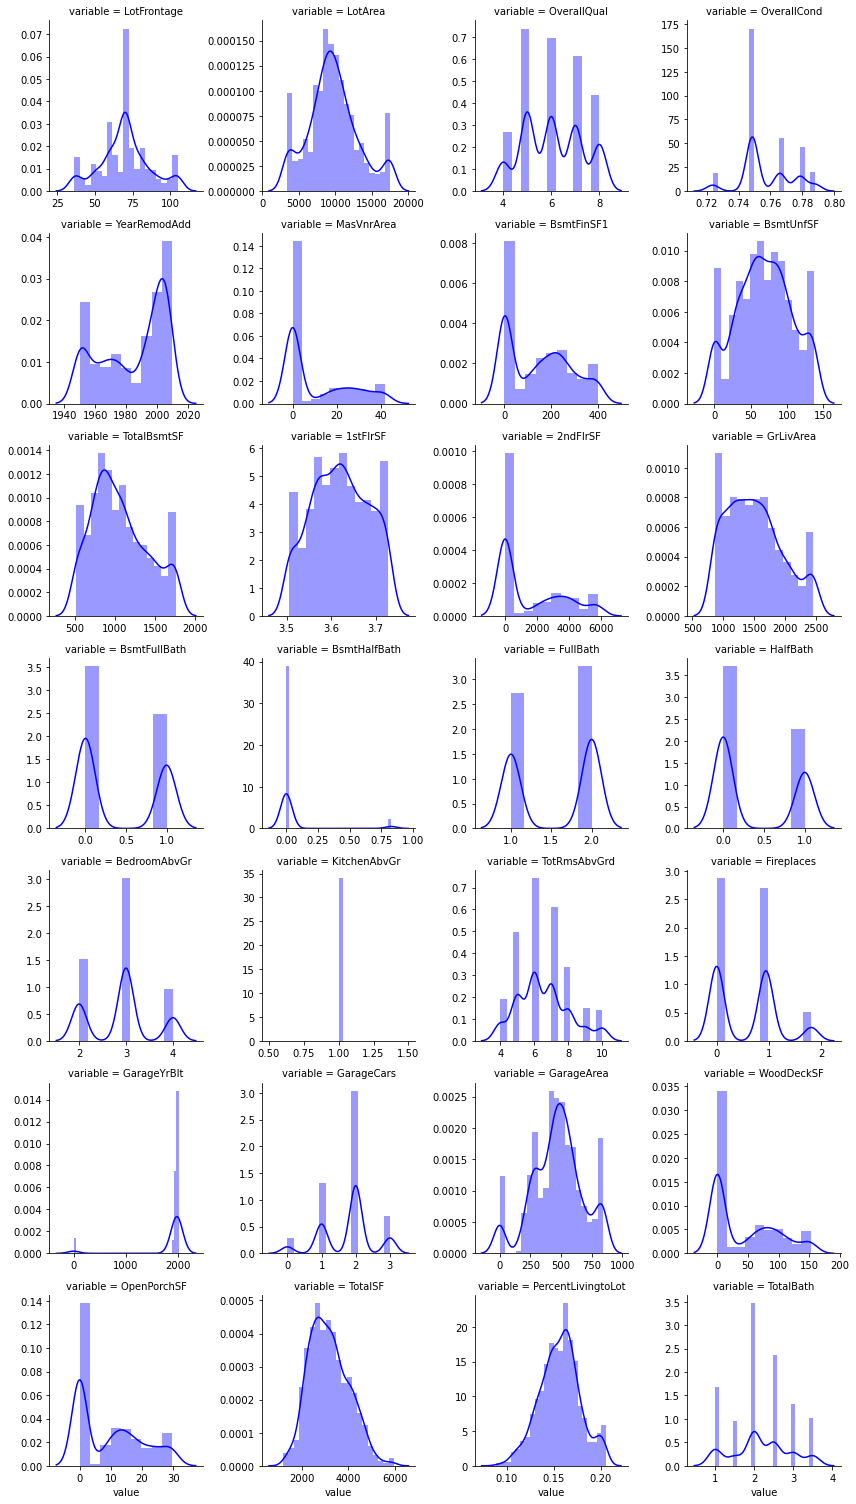

In [61]:
# We are going to use the boxcox transformation method for the numeric features to remove the skewness:

for i in trans_index:
    data_train[i] = boxcox1p(data_train[i], boxcox_normmax(data_train[i] + 1))
    
# Lets re-check the skewness after the transformation through the plot:
f = pd.melt(data_train, value_vars = plot_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="b")

In [62]:
# Transformation for test datyaset:

numeric_cols_te = data_test.select_dtypes(include=[np.number]).columns.tolist()

# for this we will exclude columns which we have derived from the dataset:

exclude_cols_te = ['Has2ndFloor','HasGarage','HasBsmt','HasFireplace']
plot_cols_te = [i for i in list(numeric_cols_te) if i not in exclude_cols_te]

# Identifying highly skewed features:

features_skewed_te = data_test[plot_cols].apply(lambda x: x.skew()).sort_values(ascending=False)

# Defining cut-off skewness = 0.5:

features_need_trans_te = features_skewed_te[features_skewed_te > 0.5]
trans_index_te = features_need_trans_te.index

print("{} numerical features need transformation :".format(features_need_trans_te.shape[0]))
skewness_te = pd.DataFrame({'Skew' :features_need_trans_te})
features_need_trans_te

13 numerical features need transformation :


BsmtHalfBath          3.544994
PercentLivingtoLot    1.893614
OpenPorchSF           1.483289
MasVnrArea            1.293865
OverallCond           1.156744
WoodDeckSF            0.981853
BsmtUnfSF             0.662343
HalfBath              0.619568
2ndFlrSF              0.602430
GrLivArea             0.565996
BsmtFinSF1            0.557214
1stFlrSF              0.547135
Fireplaces            0.540164
dtype: float64

In [63]:
# We are going to use the boxcox transformation method for the numeric features to remove the skewness:

for i in trans_index_te:
    data_test[i] = boxcox1p(data_test[i], boxcox_normmax(data_test[i] + 1))
    
# Lets re-check the skewness after the transformation through the plot:
#f = pd.melt(data_train, value_vars = plot_cols)
#g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
#g = g.map(sns.distplot, "value", color="b")

From above it can be seen that skewness is removed to the much extent from the numerical features.

ANALYZING CATEGORICAL VARIABLES

In [130]:
# let's copy our treated train and test datasets:
data_tr = data_train.copy()
test = data_test.copy()

In [131]:
## Categorical columns of training dataset
data_tr.select_dtypes('object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], dtype='object')

In [132]:
# Categorical missing values in the training dataset:

data_tr.select_dtypes('object').loc[:, data_tr.isna().sum() > 0].columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'Fence', 'MiscFeature'], dtype='object')

In [133]:
# Categorical missing values in the testing dataset:

test.select_dtypes('object').loc[:, test.isna().sum() > 0].columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'Fence', 'MiscFeature'], dtype='object')

We can see from above that both the datasets are having missing values in the same columns except column 'Electrical'. Only test dataset is having null values in this column. For all other columns imputation process would be same.

In [134]:
test.Electrical.unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [135]:
test.Electrical.value_counts()

SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64

In [136]:
# replacing nan by 'SBrkr' as it is the most occured value of this column:
test.Electrical.fillna('SBrkr', axis=0, inplace=True)

From the Data Description it is clear that some of the NaN (null) values are having meaningful description so we cannot ignore all NaN's.

In [137]:
# imputing using a contant value given in the data description sheet:

for column in [
    'Alley',
    'MasVnrType',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'Fence',
    'MiscFeature'
]:
    data_tr[column] = data_tr[column].fillna("None") 

data_tr.select_dtypes('object').loc[:, data_tr.isna().sum() > 0].columns    

Index([], dtype='object')

In [138]:
# imputing using a contant value given in the data description sheet: For test dataset

for column in [
    'Alley',
    'MasVnrType',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'Fence',
    'MiscFeature'
]:
    test[column] = test[column].fillna("None") 

test.select_dtypes('object').loc[:, test.isna().sum() > 0].columns    

Index([], dtype='object')

In [139]:
# Finding numerical features in the dataset:

num_data_1 = data_tr.select_dtypes(include = [np.number])

# Finding categorical features in the dataset:

cat_data_1 = data_tr.select_dtypes(exclude = [np.number])
# Let's print the number of numerical features and categorical features in the dataset do we have:
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(num_data_1.shape[1], cat_data_1.shape[1]))

There are 32 numerical and 46 categorical features in the training data


In [140]:
# Finding numerical features in the dataset:

num_data_2 = test.select_dtypes(include = [np.number])

# Finding categorical features in the dataset:

cat_data_2 = test.select_dtypes(exclude = [np.number])
# Let's print the number of numerical features and categorical features in the dataset do we have:
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(num_data_2.shape[1], cat_data_2.shape[1]))

There are 32 numerical and 46 categorical features in the training data


Encoding categorical features:

In [141]:
# for encoding, let's find the available category within the each categorical column:

for feature in cat_data_1:
    print("In feature {}, number of categories are {}".format(feature,len(data_tr[feature].unique())))

In feature MSSubClass, number of categories are 15
In feature MSZoning, number of categories are 5
In feature Street, number of categories are 2
In feature Alley, number of categories are 3
In feature LotShape, number of categories are 4
In feature LandContour, number of categories are 4
In feature Utilities, number of categories are 1
In feature LotConfig, number of categories are 5
In feature LandSlope, number of categories are 3
In feature Neighborhood, number of categories are 25
In feature Condition1, number of categories are 9
In feature Condition2, number of categories are 8
In feature BldgType, number of categories are 5
In feature HouseStyle, number of categories are 8
In feature YearBuilt, number of categories are 110
In feature RoofStyle, number of categories are 6
In feature RoofMatl, number of categories are 8
In feature Exterior1st, number of categories are 14
In feature Exterior2nd, number of categories are 15
In feature MasVnrType, number of categories are 4
In feature 

In [142]:
for feature in cat_data_1:
    print("In fearure {} :values{}".format(feature,data_tr[feature].unique()))

In fearure MSSubClass :values['1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
 '1-STORY 1946 & NEWER ALL STYLES' '2-STORY 1946 & NEWER'
 '1-1/2 STORY FINISHED ALL AGES' '2-STORY 1945 & OLDER'
 '1-STORY 1945 & OLDER' '2-STORY PUD - 1946 & NEWER' 'SPLIT FOYER'
 '1-1/2 STORY - UNFINISHED ALL AGES' 'DUPLEX - ALL STYLES AND AGES'
 '1-STORY W/FINISHED ATTIC ALL AGES' 'SPLIT OR MULTI-LEVEL'
 '2 FAMILY CONVERSION - ALL STYLES AND AGES' '2-1/2 STORY ALL AGES'
 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER']
In fearure MSZoning :values['RL' 'RM' 'FV' 'RH' 'C (all)']
In fearure Street :values['Pave' 'Grvl']
In fearure Alley :values['None' 'Grvl' 'Pave']
In fearure LotShape :values['IR1' 'Reg' 'IR2' 'IR3']
In fearure LandContour :values['Lvl' 'Bnk' 'HLS' 'Low']
In fearure Utilities :values['AllPub']
In fearure LotConfig :values['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
In fearure LandSlope :values['Gtl' 'Mod' 'Sev']
In fearure Neighborhood :values['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' '

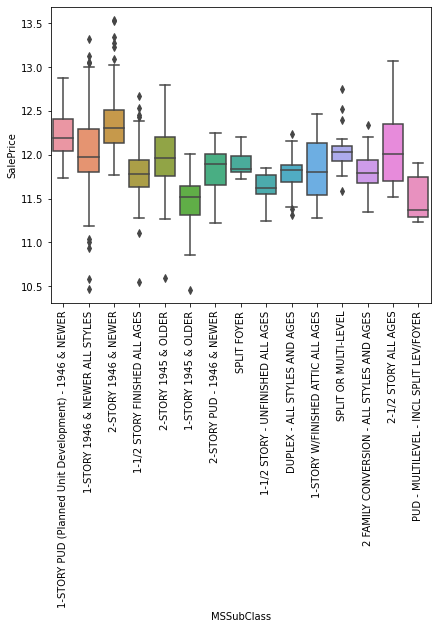

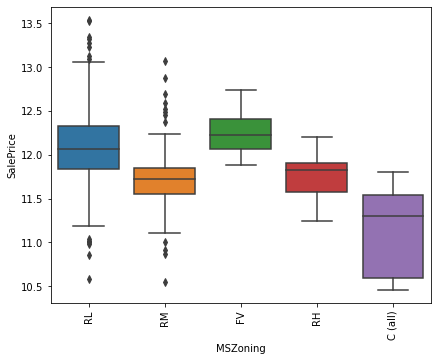

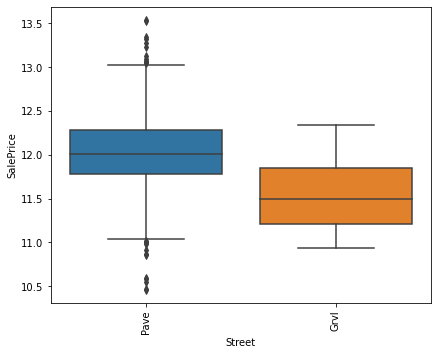

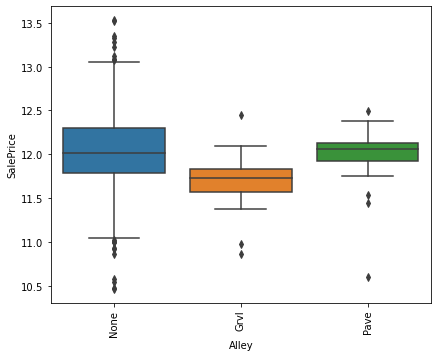

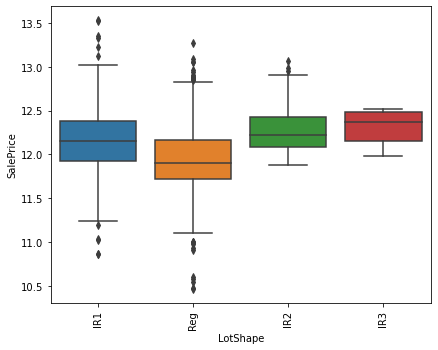

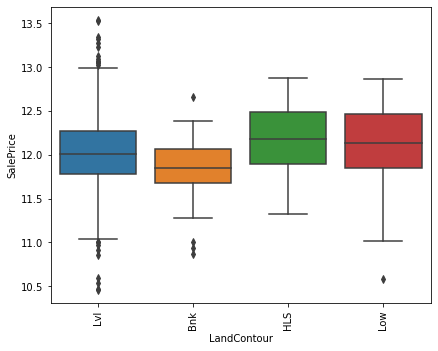

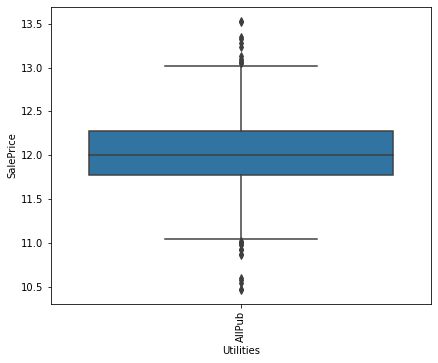

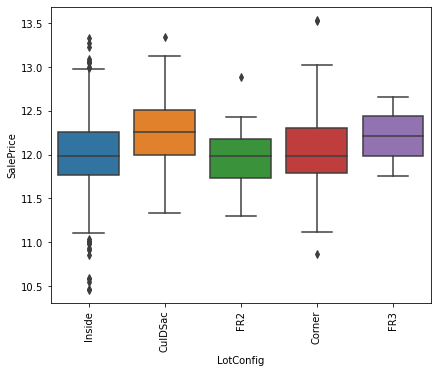

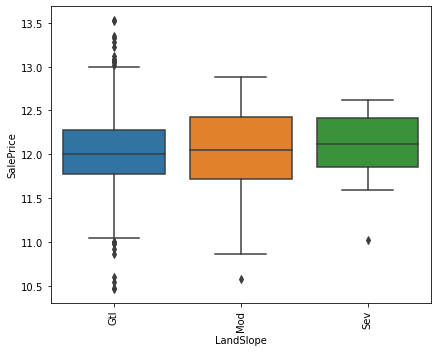

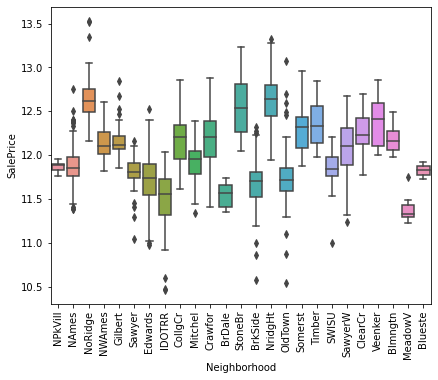

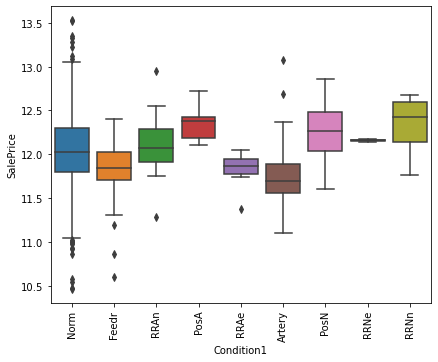

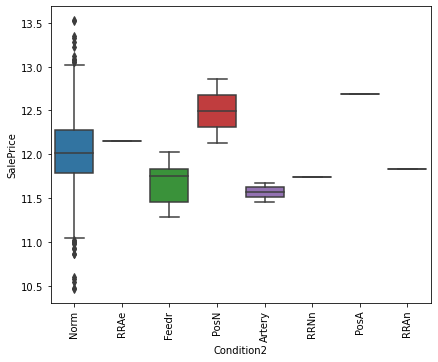

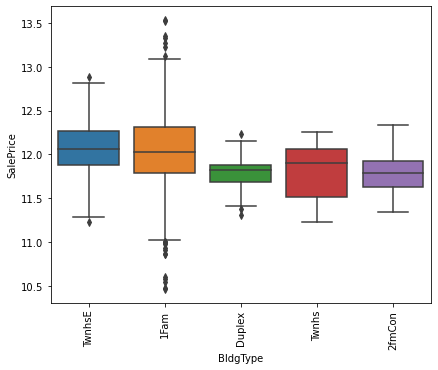

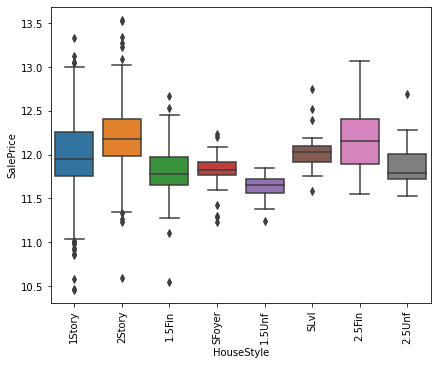

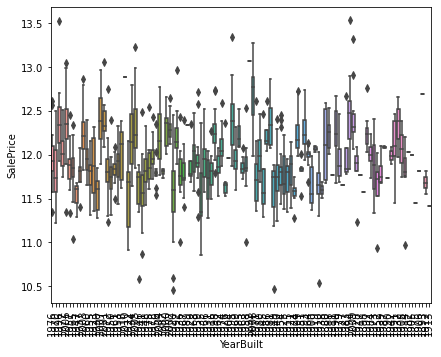

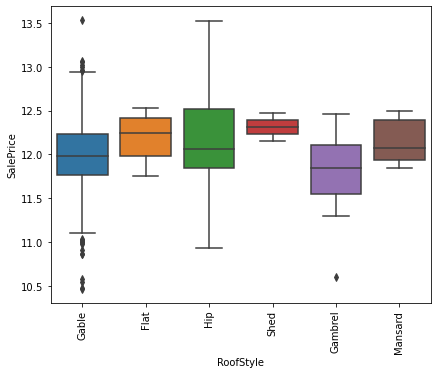

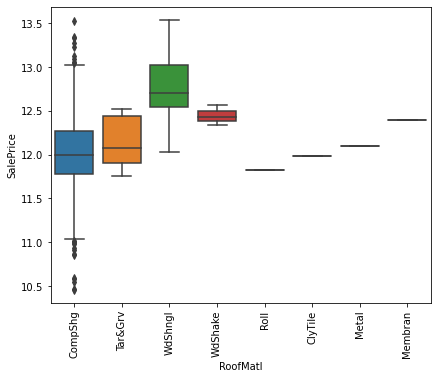

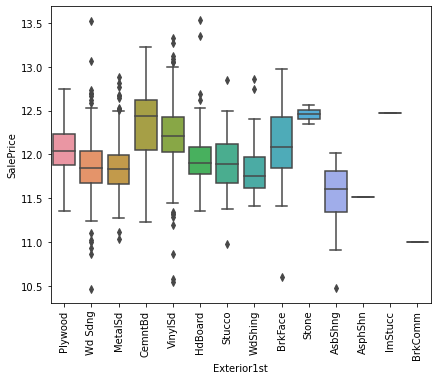

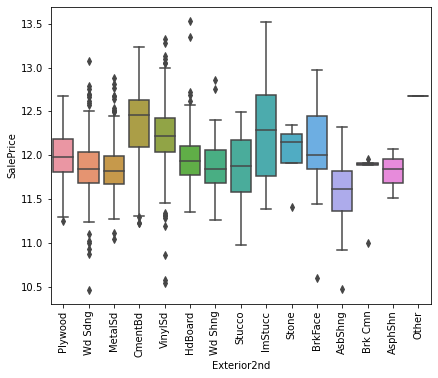

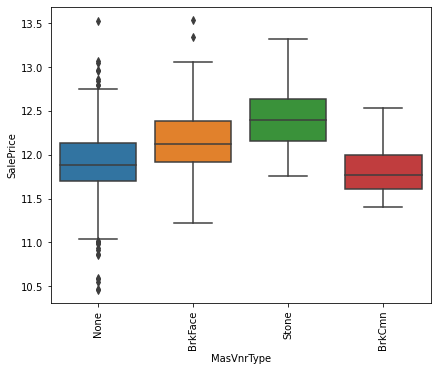

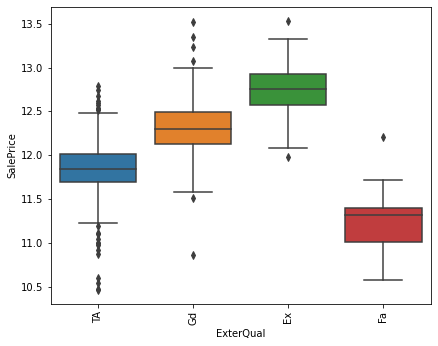

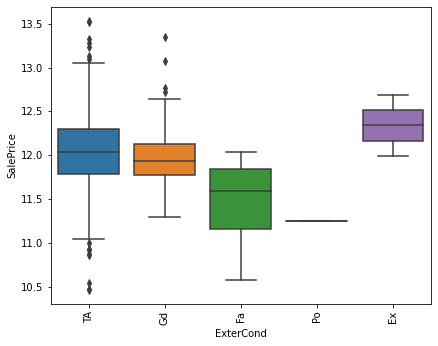

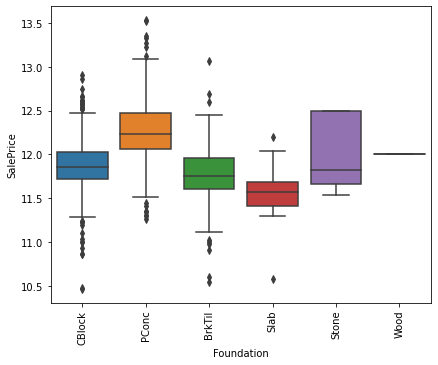

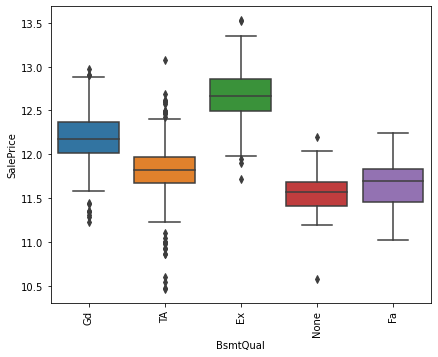

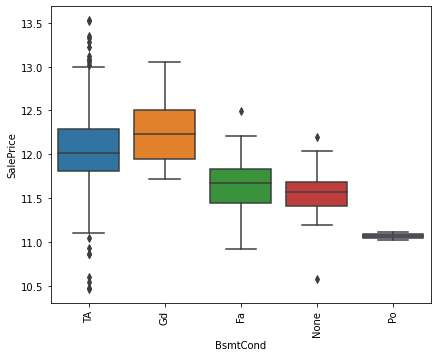

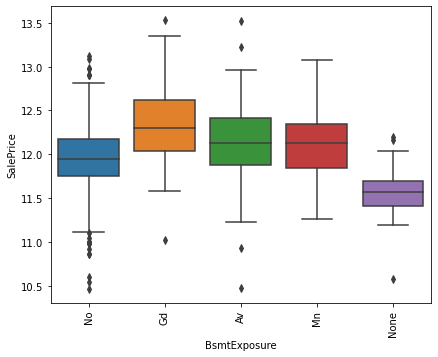

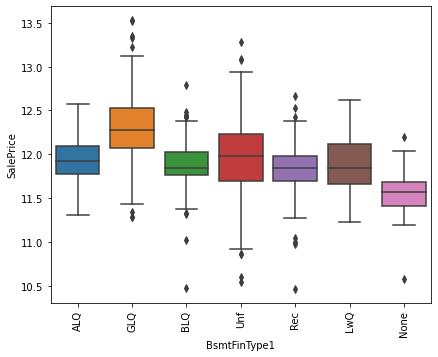

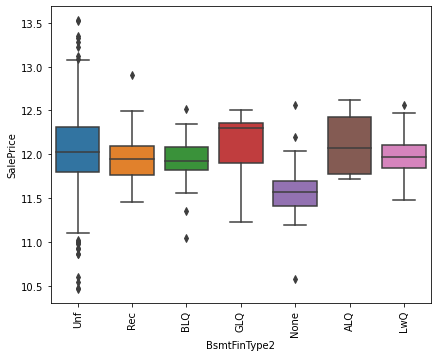

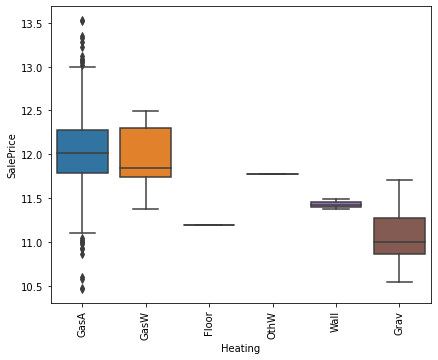

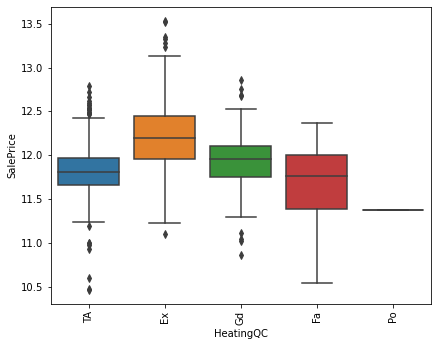

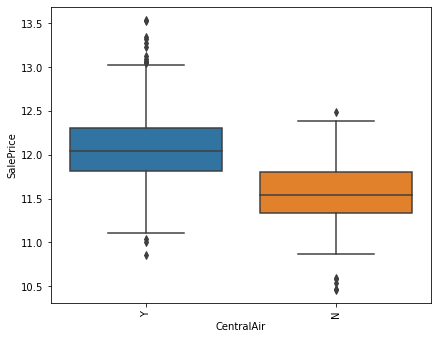

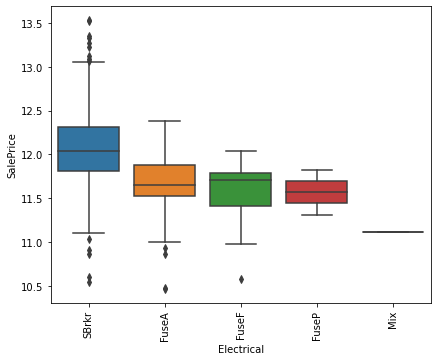

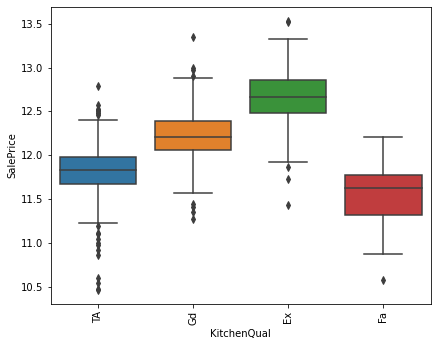

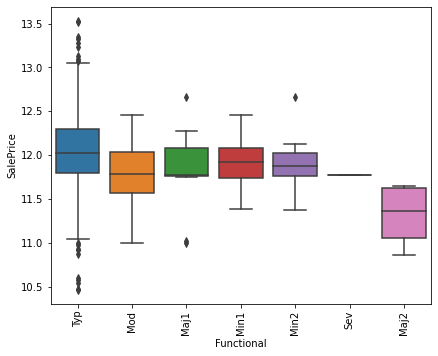

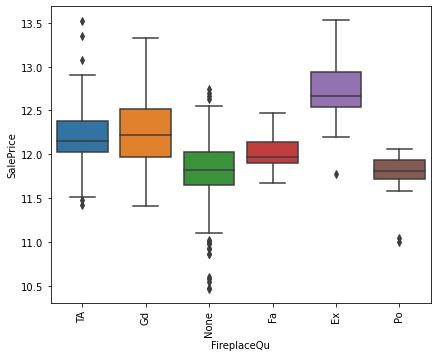

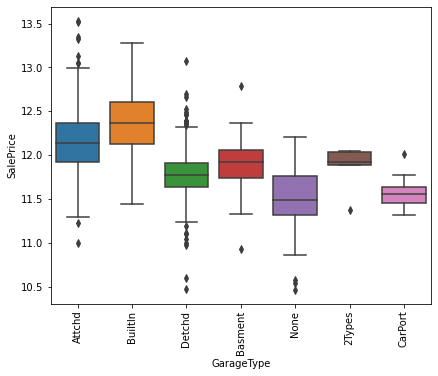

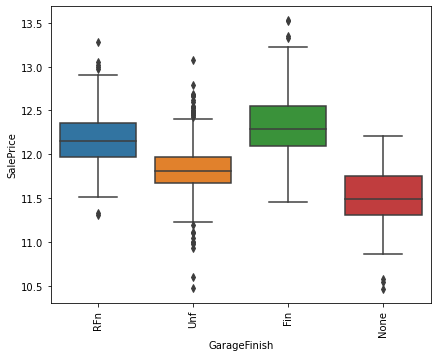

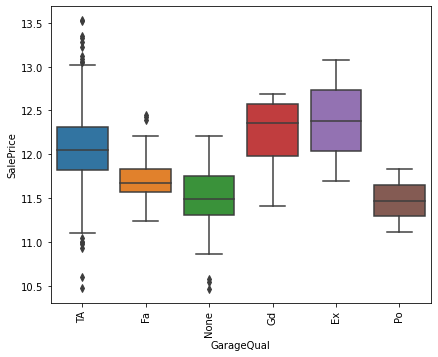

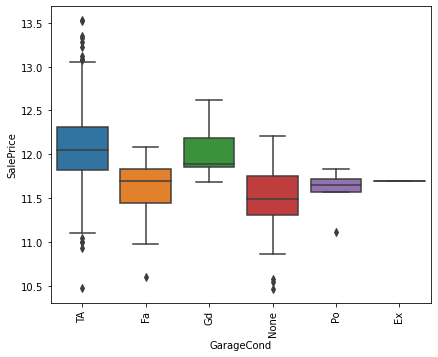

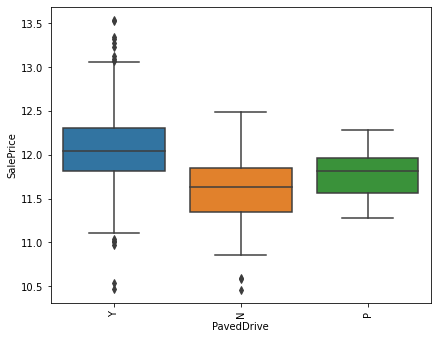

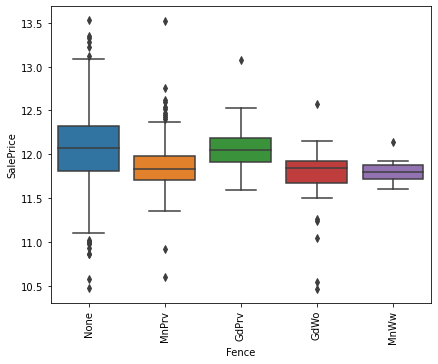

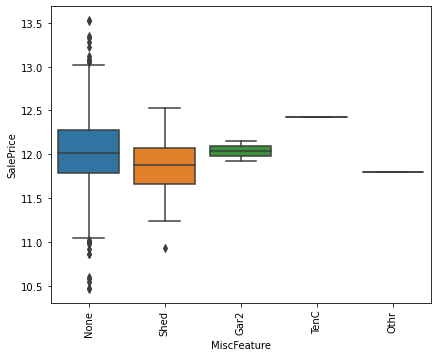

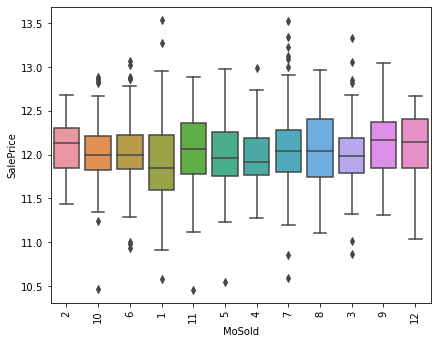

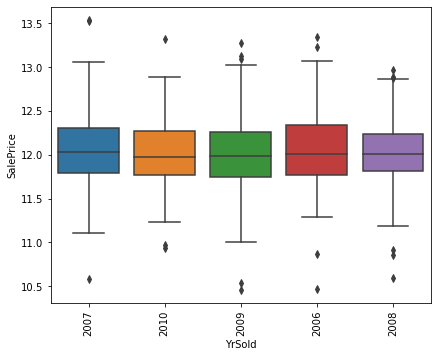

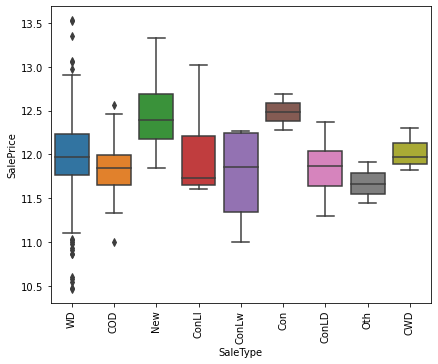

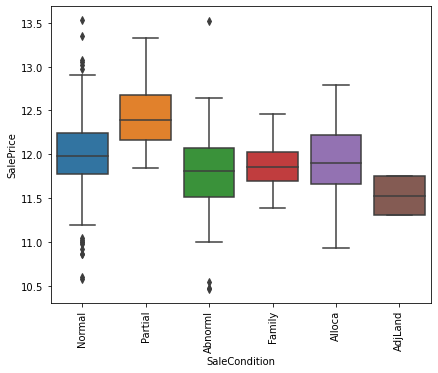

In [77]:
# plotting categorical features:
for col in cat_data_1:
    plt.figure(figsize=(15, 12))
    plt.subplot(2,2,2)
    sns.boxplot(x = cat_data_1[col], y= target_lt)
    plt.xticks(rotation=90)
plt.show()


<Figure size 720x1440 with 0 Axes>

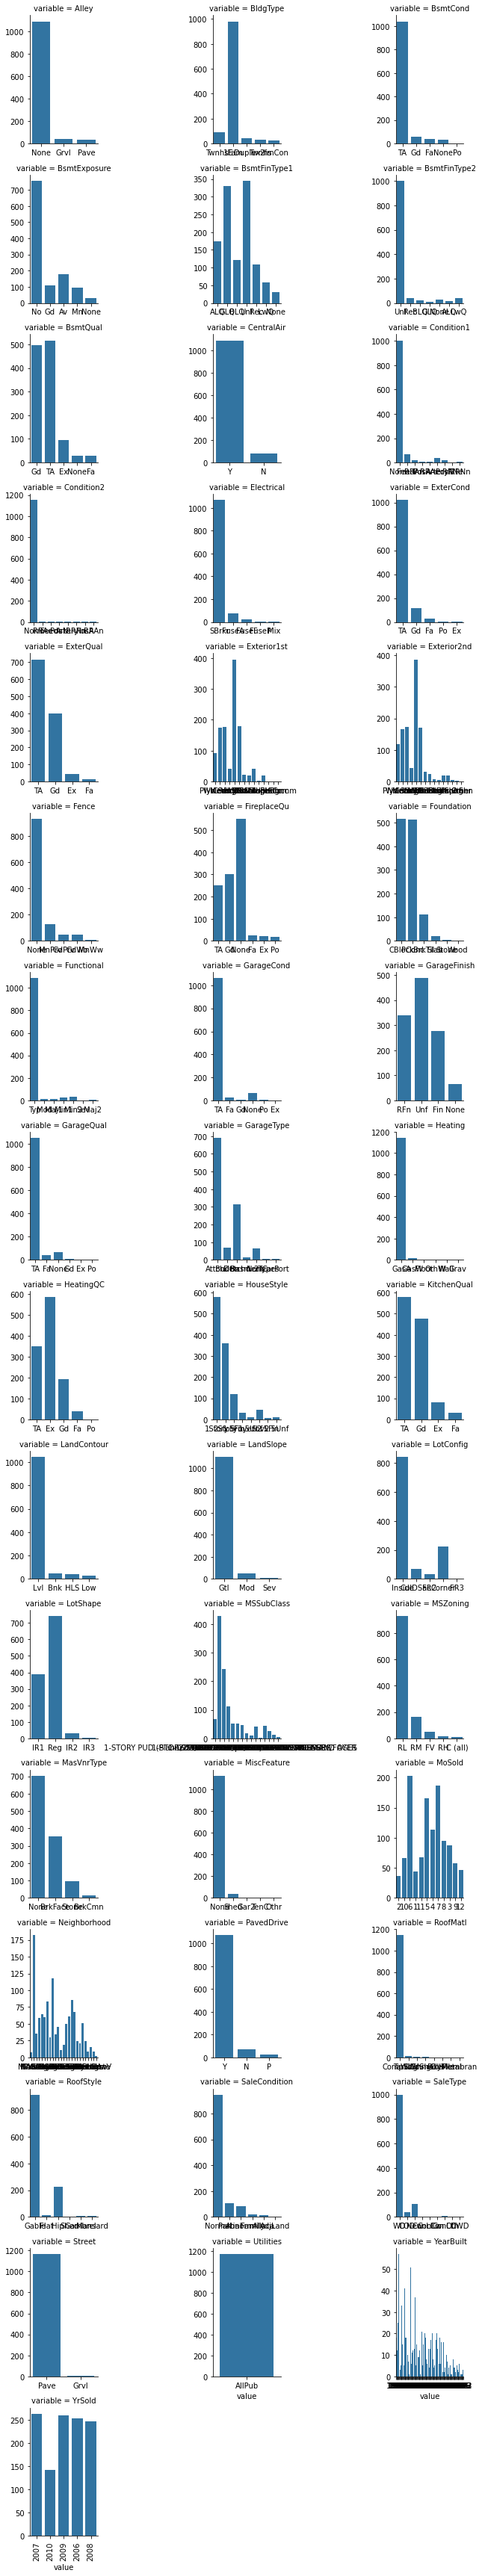

In [78]:
# plotting the categorical features:
plt.figure(figsize=(10, 20))
f = pd.melt(data_tr, value_vars = sorted(cat_data_1))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
plt.xticks(rotation=90)
g = g.map(sns.countplot, 'value')
plt.show();

We would be interested in the features with high variance; coz low variance means most of the data would be same.

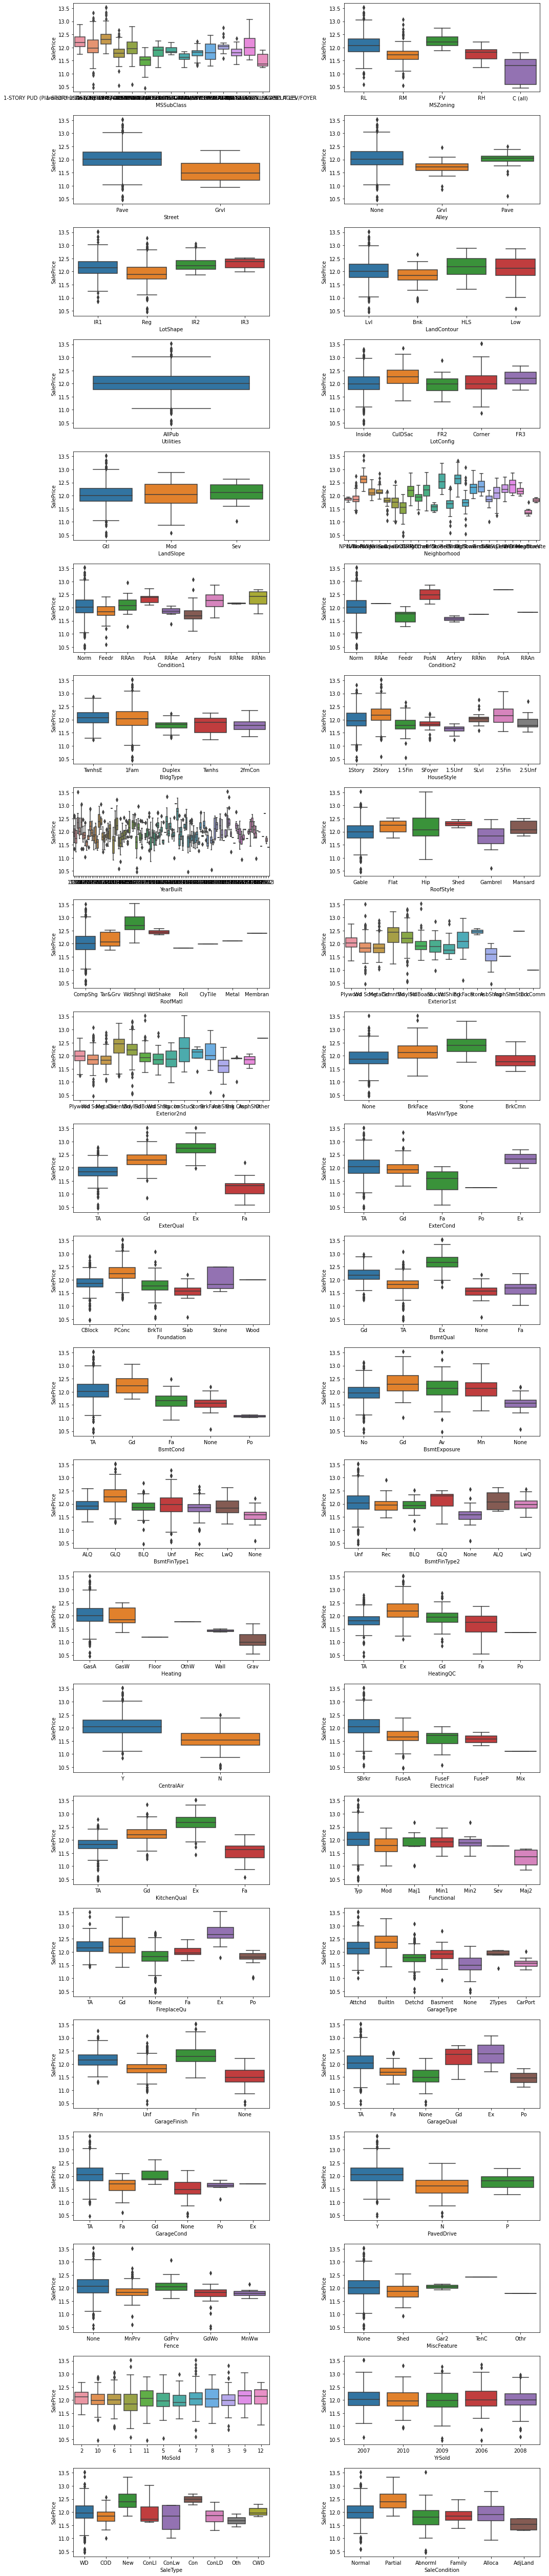

In [108]:
# Now we will analyse categorical columns with the target variable - Sales Price

cat_vars = data_tr.select_dtypes(include=['object']).columns
num_vars_per_row = 2
num_rows = int(np.ceil(len(cat_vars)/num_vars_per_row))
fig_num = 0
plt.figure(figsize=(15,70))
for var in cat_vars:
    fig_num += 1
    plt.subplot(num_rows, num_vars_per_row, fig_num)
    plt.tight_layout()
    sns.boxplot(data_tr[var], target_lt)
    plt.xlabel(var)
plt.show()

Few Insights:

1. When the overall quality is good, the sale price goes up.
2. Sale price increases as the exposure of the basement increases.
3. More the number of fireplaces, greater the sale price.
4. A bigger garage space means the price of the property is higher.

In [143]:
# If we see in the categorical features we find that below mentioned fields are ordered list, 
## we'll assign values to them in a sequence

data_tr['LotShape_d'] = data_tr['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data_tr['HouseStyle_d'] = data_tr['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
data_tr['ExterQual_d'] = data_tr['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data_tr['MasVnrType_d'] = data_tr['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
data_tr['BsmtQual_d'] = data_tr['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data_tr['BsmtExposure_d'] = data_tr['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data_tr['BsmtFinType1_d'] = data_tr['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
data_tr['HeatingQC_d'] = data_tr['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data_tr['KitchenQual_d'] = data_tr['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data_tr['GarageFinish_d'] = data_tr['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
data_tr['ExterCond_d'] = data_tr['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data_tr['BsmtCond_d'] = data_tr['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })

In [144]:
# dropping the columns for which we have created dummy columns above

data_tr = data_tr.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
              'KitchenQual', 'GarageFinish', 'HouseStyle', 'MasVnrType','ExterCond','BsmtCond'], axis=1)
data_tr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,TotalSF,PercentLivingtoLot,TotalBath,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,LotShape_d,HouseStyle_d,ExterQual_d,MasVnrType_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,HeatingQC_d,KitchenQual_d,GarageFinish_d,ExterCond_d,BsmtCond_d
0,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928.0,Pave,None,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,6.0,0.748597,1976,1976,Gable,CompShg,Plywood,Plywood,0.000000,CBlock,58.533698,Unf,104.977220,1078.00,GasA,Y,SBrkr,3.588844,0.000000,958.0,0.0,0.000000,2.0,0.0,2.0,1.0,5.0,Typ,0.942028,TA,Attchd,1977.0,2.0,440.0,TA,TA,Y,0.000000,29.722098,None,None,2,2007,WD,Normal,2646.00,0.184992,2.0,0,1,1,1,2,1,3,0,4,1,5,3,3,2,3,3
1,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865.0,Pave,None,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,8.0,0.765856,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,0.000000,PConc,140.506986,Rec,110.622174,1752.65,GasA,Y,SBrkr,3.727543,0.000000,2217.0,1.0,0.000000,2.0,0.0,4.0,1.0,8.0,Typ,0.942028,TA,Attchd,1970.0,2.0,621.0,TA,TA,Y,45.541708,29.722098,None,None,10,2007,WD,Normal,4460.85,0.146614,3.0,0,1,1,1,2,1,4,0,3,4,5,5,4,1,4,4
2,2-STORY 1946 & NEWER,RL,92.0,9920.0,Pave,None,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,7.0,0.748597,1996,1997,Gable,CompShg,MetalSd,MetalSd,0.000000,PConc,291.479980,Unf,46.152709,1117.00,GasA,Y,SBrkr,3.625309,4179.266142,2013.0,1.0,0.000000,2.0,1.0,3.0,1.0,8.0,Typ,0.942028,TA,Attchd,1997.0,2.0,455.0,TA,TA,Y,89.002969,25.371976,None,None,6,2007,WD,Normal,3895.00,0.168253,3.5,1,1,1,1,2,4,4,0,4,3,6,5,3,1,3,3
3,1-STORY 1946 & NEWER ALL STYLES,RL,105.0,11751.0,Pave,None,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,6.0,0.765856,1977,1977,Hip,CompShg,Plywood,Plywood,41.572407,CBlock,247.607876,Unf,116.784862,1752.65,GasA,Y,SBrkr,3.727543,0.000000,1844.0,0.0,0.000000,2.0,0.0,3.0,1.0,7.0,Typ,0.942028,TA,Attchd,1977.0,2.0,546.0,TA,TA,Y,0.000000,24.434346,MnPrv,None,1,2010,COD,Normal,4256.85,0.163326,2.0,0,1,1,1,2,1,3,1,4,1,4,5,3,2,3,3
4,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,16635.0,Pave,None,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,6.0,0.778483,1977,2000,Gable,CompShg,CemntBd,CmentBd,20.957327,CBlock,392.961747,Unf,56.853617,1602.00,GasA,Y,SBrkr,3.700033,0.000000,1602.0,0.0,0.825324,2.0,0.0,3.0,1.0,8.0,Typ,0.942028,TA,Attchd,1977.0,2.0,529.0,TA,TA,Y,113.208512,0.000000,None,None,6,2009,WD,Normal,3973.00,0.135209,2.5,0,1,1,1,2,1,4,1,4,1,5,4,4,3,3,3


In [111]:
data_tr.shape

(1168, 78)

In [83]:
data_tr.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'TotalSF', 'PercentLivingtoLot', 'TotalBath', 'Has2ndFloor',
       'HasGarage', 'HasBsmt', 'HasFireplace', 'LotShape_d', 'Ho

In [145]:
# Revising steps for test dataset:
test['LotShape_d'] = test['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
test['HouseStyle_d'] = test['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
test['ExterQual_d'] = test['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
test['MasVnrType_d'] = test['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
test['BsmtQual_d'] = test['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
test['BsmtExposure_d'] = test['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
test['BsmtFinType1_d'] = test['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
test['HeatingQC_d'] = test['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
test['KitchenQual_d'] = test['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
test['GarageFinish_d'] = test['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
test['ExterCond_d'] = test['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
test['BsmtCond_d'] = test['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })

In [146]:
# dropping the columns for which we have created dummy columns above

test = test.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
              'KitchenQual', 'GarageFinish', 'HouseStyle', 'MasVnrType','ExterCond','BsmtCond'], axis=1)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,TotalSF,PercentLivingtoLot,TotalBath,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,LotShape_d,HouseStyle_d,ExterQual_d,MasVnrType_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,HeatingQC_d,KitchenQual_d,GarageFinish_d,ExterCond_d,BsmtCond_d
0,1-STORY 1946 & NEWER ALL STYLES,RL,86.0,14157.0,Pave,None,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,8.0,0.607093,2005,2006,Hip,CompShg,VinylSd,VinylSd,28.482500,PConc,306.324060,Unf,100.768570,1742.55,GasA,Y,SBrkr,1.950868,0.000000,13.514115,1.0,0.0,2.0,0.000000,3.0,1.0,8.0,Typ,0.948061,Gd,Attchd,2005.0,3.0,676.0,TA,TA,Y,61.103755,12.428164,None,None,7,2007,WD,Normal,4437.35,0.151636,3.0,0,1,1,1,2,1,4,1,5,4,6,5,4,3,3,3
1,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,65.0,5814.0,Pave,None,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,8.0,0.607093,1984,1984,Gable,CompShg,HdBoard,HdBoard,0.000000,CBlock,266.268951,Unf,43.020888,1220.00,GasA,Y,SBrkr,1.943944,0.000000,12.533247,1.0,0.0,1.0,0.000000,2.0,1.0,4.0,Typ,0.948061,Ex,Attchd,1984.0,2.0,565.0,TA,TA,Y,27.864949,0.000000,None,None,8,2009,COD,Abnorml,3208.00,0.182371,2.0,0,1,1,1,2,1,4,0,4,3,6,4,4,2,3,3
2,1-STORY 1946 & NEWER ALL STYLES,RL,65.0,11838.0,Pave,None,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,8.0,0.607093,2001,2001,Hip,CompShg,VinylSd,VinylSd,0.000000,PConc,0.000000,Unf,163.362173,1742.55,GasA,Y,SBrkr,1.950845,0.000000,13.305182,0.0,0.0,2.0,0.000000,3.0,1.0,7.0,Typ,0.948061,TA,Attchd,2001.0,2.0,522.0,TA,TA,Y,67.186433,22.672222,None,None,6,2009,WD,Normal,4405.55,0.162214,2.0,0,1,1,1,3,1,4,0,4,3,1,5,5,2,3,3
3,2-STORY 1945 & OLDER,RL,75.0,12000.0,Pave,None,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,7.0,0.621713,1941,1950,Gable,CompShg,MetalSd,MetalSd,0.000000,CBlock,95.684197,Unf,75.097105,704.00,GasA,Y,SBrkr,1.930048,5583.554557,12.923813,0.0,0.0,1.0,19.712794,3.0,1.0,7.0,Typ,0.948061,Gd,Attchd,1941.0,1.0,234.0,TA,TA,Y,0.000000,0.000000,None,None,7,2009,WD,Normal,2502.00,0.124139,1.5,1,1,1,1,3,4,3,0,3,1,3,5,2,1,3,3
4,2-STORY 1946 & NEWER,RL,86.0,14598.0,Pave,None,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,6.0,0.607093,2007,2007,Gable,CompShg,VinylSd,VinylSd,16.273469,PConc,0.000000,Unf,121.226733,894.00,GasA,Y,SBrkr,1.931350,9484.788627,13.530705,0.0,0.0,2.0,19.712794,4.0,1.0,9.0,Typ,0.948061,Gd,BuiltIn,2007.0,3.0,668.0,TA,TA,Y,39.573551,6.720066,None,None,1,2008,WD,Normal,3613.00,0.135947,2.5,1,1,1,1,2,4,4,1,4,2,1,5,4,3,3,3


In [147]:
test.shape

(292, 78)

In [148]:
# Finding numerical features in the dataset:

num_data_f = data_tr.select_dtypes(include = [np.number])

# Finding categorical features in the dataset:

cat_data_f = data_tr.select_dtypes(exclude = [np.number])
# Let's print the number of numerical features and categorical features in the dataset do we have:
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(num_data_f.shape[1], cat_data_f.shape[1]))

There are 44 numerical and 34 categorical features in the training data


In [149]:
# Finding numerical features in the dataset:

num_data_test = test.select_dtypes(include = [np.number])

# Finding categorical features in the dataset:

cat_data_test = test.select_dtypes(exclude = [np.number])
# Let's print the number of numerical features and categorical features in the dataset do we have:
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(num_data_test.shape[1], cat_data_test.shape[1]))

There are 44 numerical and 34 categorical features in the training data


In [ ]:
# We'll use One hot encoding for rest of the categorical features:

category = data_tr.select_dtypes(include=['object']).columns

data_tr = pd.get_dummies(data=data_tr, columns=category)

In [150]:
# For the following columns create dummies

# MSSubClass Dummy
d_MSSubClass = pd.get_dummies(data_tr['MSSubClass'], prefix='MSSubClass', drop_first = True)
data_tr = pd.concat([data_tr, d_MSSubClass], axis = 1)


# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(data_tr['Neighborhood'], prefix='Neighborhood', drop_first = True)
data_tr = pd.concat([data_tr, d_Neighborhood], axis = 1)


# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(data_tr['Exterior1st'], prefix='Exterior1st', drop_first = True)
data_tr = pd.concat([data_tr, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(data_tr['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
data_tr = pd.concat([data_tr, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(data_tr['Foundation'], prefix='Foundation', drop_first = True)
data_tr = pd.concat([data_tr, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(data_tr['GarageType'], prefix='GarageType', drop_first = True)
data_tr = pd.concat([data_tr, d_GarageType], axis = 1)

# Creating dummy for FireplaceQu

d_FireplaceQu = pd.get_dummies(data_tr['FireplaceQu'], prefix='FireplaceQu', drop_first = True)
data_tr = pd.concat([data_tr, d_FireplaceQu], axis = 1)


data_tr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,TotalSF,PercentLivingtoLot,TotalBath,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,LotShape_d,HouseStyle_d,ExterQual_d,MasVnrType_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,HeatingQC_d,KitchenQual_d,GarageFinish_d,ExterCond_d,BsmtCond_d,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,70.0,4928.0,Pave,None,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,6.0,0.748597,1976,1976,Gable,CompShg,Plywood,Plywood,0.000000,CBlock,58.533698,Unf,104.977220,1078.00,GasA,Y,SBrkr,3.588844,0.000000,958.0,0.0,0.000000,2.0,0.0,2.0,1.0,5.0,Typ,0.942028,TA,Attchd,1977.0,2.0,440.0,TA,TA,Y,0.000000,29.722098,None,None,2,2007,WD,Normal,2646.00,0.184992,2.0,0,1,1,1,2,1,3,0,4,1,5,3,3,2,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,15865.0,Pave,None,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,8.0,0.765856,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,0.000000,PConc,140.506986,Rec,110.622174,1752.65,GasA,Y,SBrkr,3.727543,0.000000,2217.0,1.0,0.000000,2.0,0.0,4.0,1.0,8.0,Typ,0.942028,TA,Attchd,1970.0,2.0,621.0,TA,TA,Y,45.541708,29.722098,None,None,10,2007,WD,Normal,4460.85,0.146614,3.0,0,1,1,1,2,1,4,0,3,4,5,5,4,1,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2-STORY 1946 & NEWER,RL,92.0,9920.0,Pave,None,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1

In [151]:
# For the following columns create dummies

# MSSubClass Dummy
d_MSSubClass = pd.get_dummies(test['MSSubClass'], prefix='MSSubClass', drop_first = True)
test = pd.concat([test, d_MSSubClass], axis = 1)


# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(test['Neighborhood'], prefix='Neighborhood', drop_first = True)
test = pd.concat([test, d_Neighborhood], axis = 1)


# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(test['Exterior1st'], prefix='Exterior1st', drop_first = True)
test = pd.concat([test, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(test['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
test = pd.concat([test, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(test['Foundation'], prefix='Foundation', drop_first = True)
test = pd.concat([test, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(test['GarageType'], prefix='GarageType', drop_first = True)
test = pd.concat([test, d_GarageType], axis = 1)

# Creating dummy for FireplaceQu

d_FireplaceQu = pd.get_dummies(test['FireplaceQu'], prefix='FireplaceQu', drop_first = True)
test = pd.concat([test, d_FireplaceQu], axis = 1)


test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,TotalSF,PercentLivingtoLot,TotalBath,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,LotShape_d,HouseStyle_d,ExterQual_d,MasVnrType_d,BsmtQual_d,BsmtExposure_d,BsmtFinType1_d,HeatingQC_d,KitchenQual_d,GarageFinish_d,ExterCond_d,BsmtCond_d,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,1-STORY 1946 & NEWER ALL STYLES,RL,86.0,14157.0,Pave,None,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,8.0,0.607093,2005,2006,Hip,CompShg,VinylSd,VinylSd,28.482500,PConc,306.324060,Unf,100.768570,1742.55,GasA,Y,SBrkr,1.950868,0.000000,13.514115,1.0,0.0,2.0,0.000000,3.0,1.0,8.0,Typ,0.948061,Gd,Attchd,2005.0,3.0,676.0,TA,TA,Y,61.103755,12.428164,None,None,7,2007,WD,Normal,4437.35,0.151636,3.0,0,1,1,1,2,1,4,1,5,4,6,5,4,3,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,65.0,5814.0,Pave,None,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,8.0,0.607093,1984,1984,Gable,CompShg,HdBoard,HdBoard,0.000000,CBlock,266.268951,Unf,43.020888,1220.00,GasA,Y,SBrkr,1.943944,0.000000,12.533247,1.0,0.0,1.0,0.000000,2.0,1.0,4.0,Typ,0.948061,Ex,Attchd,1984.0,2.0,565.0,TA,TA,Y,27.864949,0.000000,None,None,8,2009,COD,Abnorml,3208.00,0.182371,2.0,0,1,1,1,2,1,4,0,4,3,6,4,4,2,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1-STORY 1946 & NEWER ALL STYLES,RL,65.0,11838.0,Pave,None,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,8.0,0.607093,2001,2001,Hip,CompShg,VinylSd,VinylSd,0.000000,PConc,0.0

In [152]:
test.shape

(292, 155)

In [153]:
data_tr.shape

(1168, 159)

In [154]:
#Columns in df2 not in df1
data_tr.columns.difference(test.columns)

Index(['Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Other', 'Neighborhood_Blueste'], dtype='object')

In [155]:
test.columns.difference(data_tr.columns)

Index(['Exterior1st_CBlock', 'Exterior2nd_CBlock'], dtype='object')